# Detector Acceptance and Efficiency

<CENTER><img src="../../images/ATLASOD.gif" style="width:50%"></CENTER>

This notebook uses ATLAS Open Data https://opendata.atlas.cern to teach you the concepts of detector acceptance and efficiency!

ATLAS Open Data provides open access to proton-proton collision data at the LHC for educational purposes. ATLAS Open Data resources are ideal for high-school, undergraduate and postgraduate students.

## Introduction

In High Energy Physics (HEP), each particle collision is referred to as an *event*. When performing any measurement or search for new particles, we must rely on our detector's ability to correctly detect, identify, and reconstruct as many of these events as possible so that we can trace them back to the appropriate physics process (e.g. Higgs boson production).

It is greatly important for particle physicists to know how well their detector can achieve this. However, there is an immediate issue: In order to determine how well a detector can correctly detect and reconstruct events, we need to know what truly happened in these events so that we can compare with the detector's reconstruction of these events. Of course, we can't tell exactly what truly happened in these events, which is why we are using a detector to reconstruct them to begin with! How then can we determine the performance of our detector?

The trick is to produce *simulations* of these events, and then produce a simulation of how the detector reconstructs these events. In these simulated events, we know the truth and can compare that with the (simulated) reconstruction of the events. From the simulated data, we can then determine the expected performance of our real detector. In particular, two parameters of interest that quantify the performance of a detector are its *acceptance* and *efficiency*. Before we define these two terms, we will first briefly discuss the typical simulations used in HEP experiments. (You can also read [this page](https://opendata.atlas.cern/docs/documentation/monte_carlo/MC_production_chain) for more details.) Once we have a good understanding of these concepts, we will then apply them by creating an acceptance and efficiency map of an ATLAS experiment involving the decay of a Z boson into two muons!

## Monte Carlo Simulations

Monte Carlo (MC) simulations are computer-generated models that mimic particle collisions as measured by a detector. In HEP experiments, they are used to theoretically model how particle collisions would look like inside a detector. These simulations take into account the complex physics of particle collisions, as well as the geometry and material properties of the detector itself. In addition, they also include approximations and assumptions about the physics processes and the detector response.

The figure below shows a flow chart outlining how real data from an actual experiment and MC simulated data are processed and then analyzed. In particular, we will focus our attention on the *event generator*, *detector simulation*, and *reconstruction* processes, as these steps will lead into our dicussion of a detector's acceptance and efficiency.

<div>
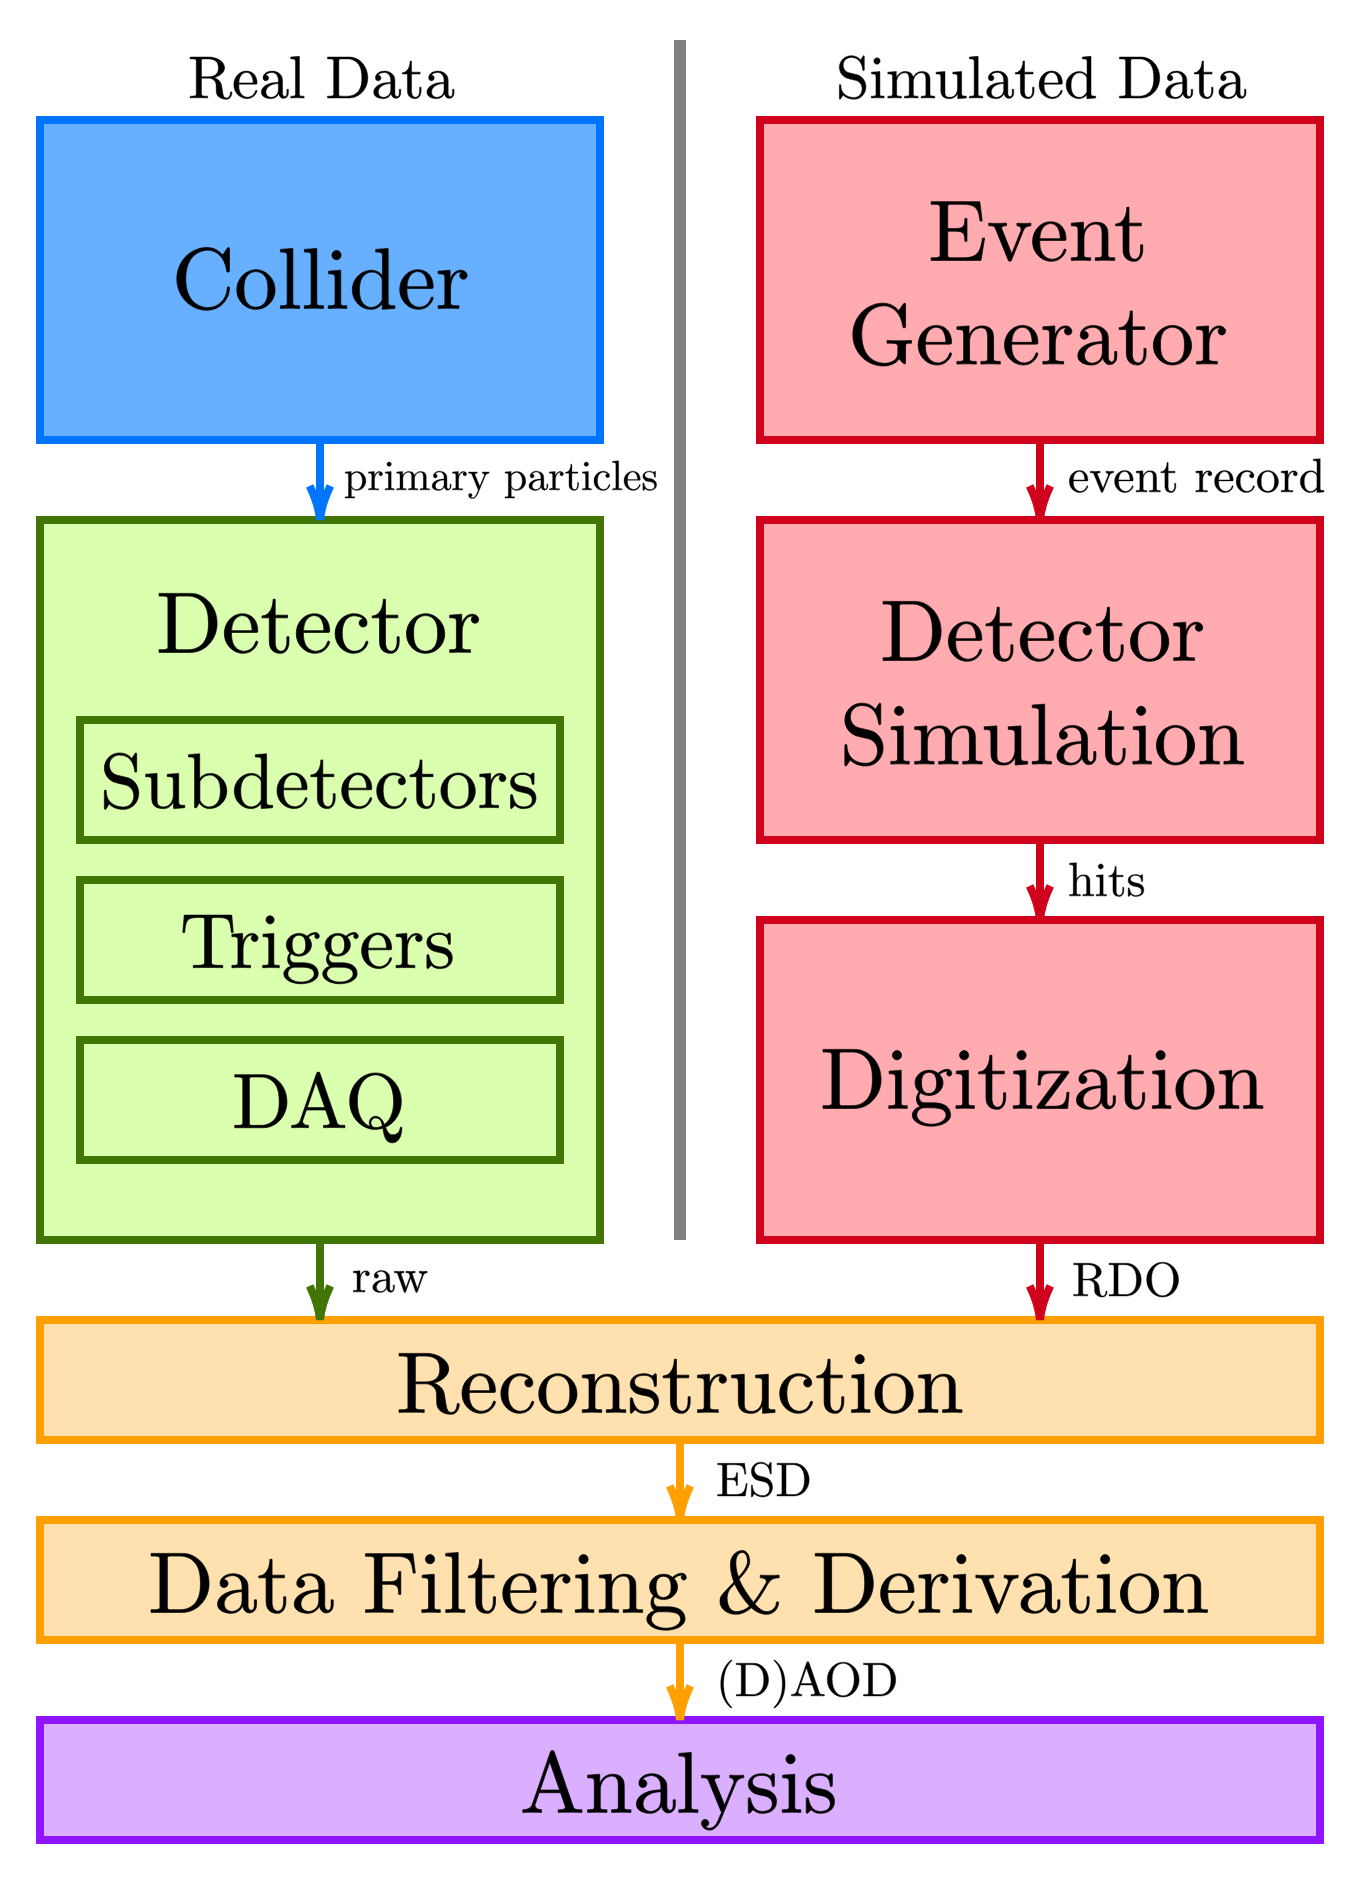
</div>

**Figure 1.** A flow chart of data processing of real and simulated data. Each box represents an algorithm for a specific process. The data fromats are written next to the arrows. [Redrawn from *Practical Collider Physics*]

### Event Generation

In place of a collider, an MC simulation uses **event generator** programs to simulate the collisions of a particular experiment. These events are often called **truth events**, and the physical quantities collected from each event---such as the energy, momentum, and angles of each particle in each event---are stored and refered to as **truth variables**. Unlike in a real experiment in which you never know the true or exact values of each particle, the event generator outputs the exact particle properties as they would appear in nature.

### Detector Simulation

In place of a physical detector, an MC simulation uses a **detector simulation** to model the way particles from the collision (the output of the event generator) would propagate through and interact with the detetor material. In the next step, it models how the detector would "see" those interactions as voltages, currents, and digital signals. The output of these steps closely resembles the raw data that comes from the real detector, but it still contains the output of the event generator (the true nature of the particles).

### Reconstruction

Once a detector has collected data from a collision, the data is fed into a **reconstruction** program that attempts to reconstruct the particles in the events that were recorded. Both the real and simulated data use the exact same reconstruction program, as indicated in the flow chart of Figure 1. 


At this point, we have the two essential kinds of (simulated) data needed to determine the performance of the detector: (1) the truth events, which gives information on the exact nature of the event; and (2) the reconstructed events, which tells us how those truth events might appear in the detector. We are now in a position to determine the acceptance and efficiency of the detector.

## Detector Acceptance

The **acceptance** of a detector quantifies the geometrical and kinematical constraints of the detector, or of the selection being applied in an analysis. In other words, for a given event, the acceptance tells us whether the event can, in principle, be selected if the detector perfectly reconstructs all the particles it is capable of reconstructing. 

We define the acceptance by the following ratio:

$$ 
\text{Acceptance} = \frac{ \text{Number of truth events within detectable region} }{ \text{Total number of truth events} } 
$$

The values for acceptance range from 0 to 1, with 0 (or 0%) indicating that even a perfect detector would not detect any of the events, and 1 (or 100%) indicating that the detector can (ideally) detect all of the events within the detectable region. It is desirable to have as high an acceptance as possible as this would indicate that the detector is capable of collecting as many events as possible, providing more data and information about the physical process. 

Common reasons that the acceptance of a detector might not be 100% include particles that are produced too close to the beams (where there is no instrumentation), or at too low momentum (where they cannot be reconstructed).

## Detector Efficiency

The **efficiency** of a detector quantifies how well the detector can reconstruct the events that lie within its acceptance.

We define the efficiency of the detector by the following ratio:

$$ 
\text{Efficiency} = \frac{ \text{Number of successfully reconstructed events} }{ \text{Number of events within the acceptance of the detector} } 
$$

The values for efficiency normally range from 0 to 1, with 0 (or 0%) indicating that the detector cannot reconstruct any of the events, and 1 (or 100%) indicating that the detector is able to reconstruct every event. (Of course, these are both extreme cases. It is very rare to have a detector efficiency that is close to 0, if the detector acceptance is defined correctly. It is also possible in some unusual cases to have an efficiency above 100%; we will discuss this more towards the end of the notebook.) It is desirable to have as high an efficiency as possible. By examining the efficiency of the simulated events, we can then have an idea of how well our detector(s) can reconstruct real events.

Once common reason that the efficiency of a detector might not be 100% is broken detector elements, often described as "holes" in the detector.

When performing an analysis, it is very important that the MC simulation matches the performance in the real detector data. In order to ensure that it does, we often use real data to fine-tune these MC simulations. In some of the other notebooks that make use of the ATLAS Open Data, you will often find "scale factors" employed that have been derived to correct small differences between the data and the MC simulation.

## ATLAS Open Data Initialisation

Now that we have learned these concepts, we are ready to apply them to ATLAS Open Data. The first step in doing this is to set everything up.

### Running a Python notebook

A Python notebook consists of cell blocks, each containing lines of Python code. Each cell can be run independently of each other, yielding respective outputs below the cells. Conventionally, cells are run in order from top to bottom.

- To run the whole notebook, in the top menu click Cell $\to$ Run All.

- To propagate a change you've made to a piece of code, click Cell $\to$ Run All Below.

- You can also run a single code cell, by clicking Cell $\to$ Run Cells, or using the keyboard shortcut Shift+Enter.

For more information, refer to [this page](https://www.codecademy.com/article/how-to-use-jupyter-notebooks).

### First time package installation on your computer (not needed on mybinder)

This first cell installs the required python packages. It only needs to be run the first time you open this notebook on your computer. If you close Jupyter and re-open on the same computer, you won't need to run this first cell again. If this is opened on mybinder, you don't need to run this cell.

In [1]:
import sys
import os.path
!pip install atlasopenmagic
from atlasopenmagic import install_from_environment
install_from_environment()

Installing packages: ['aiohttp>=3.9.5', 'atlasopenmagic', 'awkward>=2.6.7', 'awkward-pandas>=2023.8.0', 'coffea~=0.7.0', 'hist>=2.8.0', 'ipykernel>=6.29.5', 'jupyter>=1.0.0', 'lmfit>=1.3.2', 'matplotlib>=3.9.1', 'metakernel>=0.30.2', 'notebook<7', 'numpy>=1.26.4', 'pandas>=2.2.2', 'papermill>=2.6.0', 'pip>=24.2', 'scikit-learn>=1.5.1', 'uproot>=5.3.10', 'uproot3>=3.14.4', 'fsspec-xrootd>=0.5.1', 'jupyterlab_latex~=3.1.0', 'vector>=1.4.1']


INFO: pip is looking at multiple versions of coffea to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of coffea to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 638.7/638.7 kB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 38.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 36.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 16.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [uproot]2m7/8 [uproot]]nmagic]


We're going to import a number of packages to help us:
* `numpy`: provides numerical calculations such as histogramming
* `matplotlib`: common tool for making plots, figures, images, visualisations
* `uproot`: processes `.root` files typically used in particle physics into data formats used in python
* `awkward`: introduces `awkward` arrays, a format that generalizes `numpy` to nested data with possibly variable length lists
* `vector`: to allow vectorized 4-momentum calculations

In [2]:
import numpy as np # for numerical calculations such as histogramming
import matplotlib.pyplot as plt # for plotting
import matplotlib_inline # to edit the inline plot format
#matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg') # to make plots in pdf (vector) format
from matplotlib.ticker import AutoMinorLocator # for minor ticks
import uproot # for reading .root files
import awkward as ak # to represent nested data in columnar format
import vector # for 4-momentum calculations
import time # for printing time stamps
import requests # for file gathering, if needed; for HTTP access

In [3]:
# Get the files locally, rather than streaming the data (easier on the upstream servers)
local_files = True

Unit definitions, as stored in the data files:

In [4]:
MeV = 0.001
GeV = 1.0

## Case Study 1: $Z \rightarrow \mu \mu$

To reinforce the ideas of detector accepetance and efficiency, we shall apply these concepts by creating acceptance and efficiency maps for muons in the ATLAS experiment. We will use the [atlasopenmagic](https://opendata.atlas.cern/docs/data/atlasopenmagic) to access the open data directly from the ATLAS OpenData Portal so no need to download any samples. First we need to import the module and load the release.

In [5]:
# ATLAS Open Data directory
import atlasopenmagic as atom
atom.available_releases()
atom.set_release('2025e-13tev-beta')

{'2016e-8tev': '2016 Open Data for education release for 8 TeV proton-proton '
               'collisions (https://opendata.cern/record/3860).',
 '2024r-pp': '2024 Open Data for research release for proton-proton collisions '
             '(https://opendata.cern/record/80020).',
 '2025e-13tev-beta': '2025 Open Data for education and outreach beta release '
                     'for 13 TeV proton-proton collisions '
                     '(https://opendata.cern.ch/record/93910).'}


Next, we would like to read some of the data from the open dataset.

In [6]:
lumi = 36.6 # fb-1 # data size of the full release 
fraction = 1.0 # reduce this is if you want the code to run quicker

We next choose the `skim` for our analysis. This places cuts into our data. However, in calculating the acceptance and efficiency we do not want to place any cuts. We therefore choose `noskim`.

In [7]:
# Select the skim to use for the analysis
skim = "noskim"

For convenient naming and identification purposes, we define a dictionary which stores all the important names of the samples we want to pull from the database. The datset ID's can be found here on [this page](https://opendata.atlas.cern/docs/data/for_education/13TeV25_metadata).

In [8]:
mc_defs = { r'mu_mu': {'dids': [700323,700324,700325]} } # Dataset ID's for the 2muon data we want to explore

mc_samples   = atom.build_mc_dataset(mc_defs, skim=skim, protocol='https')
data_samples = atom.build_data_dataset(skim, protocol='https')

samples = {**data_samples, **mc_samples}

Let's try accessing `data15_periodD` in the CERN database URL as an example.

In [9]:
samples.keys()

dict_keys(['Data', 'mu_mu'])

In [10]:
# We shall use the first entry in 'list', 'data15_periodD'
value = samples['mu_mu']['list'][0]
print(f"{value = }")

# This is now appended to our file path to retrieve the data_A.4lep.root file
data15_periodD = value #path + "Data/" + value + ".root"

value = 'https://opendata.cern.ch//eos/opendata/atlas/rucio/user/egramsta/mc_700323.Sh_2211_Zmumu_maxHTpTV2_BFilter.noskim.root'


Next, we shall try opening the `data15_periodD` file to see what is inside.

In [11]:
# Accessing the file from the online database (":analysis" opens the tree in a desired manner)
if local_files:
    
    # Download the file, use a local copy
    local_filename = data15_periodD.split("/")[-1]
    print(f"Downloading {data15_periodD} to {local_filename} ...")
    
    with requests.get(data15_periodD, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, "wb") as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)
                
    tree = uproot.open(local_filename + ":analysis")
else: # Stream files
    tree = uproot.open(data15_periodD + ":analysis")

In [12]:
# We can view all the information stored in the tree using the .keys() method.
print(tree.num_entries)
print(tree.keys())

3994786
['num_events', 'sum_of_weights', 'sum_of_weights_squared', 'xsec', 'kfac', 'filteff', 'TriggerMatch_DILEPTON', 'ScaleFactor_MLTRIGGER', 'ScaleFactor_PILEUP', 'ScaleFactor_FTAG', 'mcWeight', 'channelNumber', 'eventNumber', 'runNumber', 'trigML', 'trigP', 'trigDT', 'trigT', 'trigE', 'trigDM', 'trigDE', 'trigM', 'trigMET', 'ScaleFactor_BTAG', 'ScaleFactor_JVT', 'jet_n', 'jet_pt', 'jet_eta', 'jet_phi', 'jet_e', 'jet_btag_quantile', 'jet_jvt', 'largeRJet_n', 'largeRJet_pt', 'largeRJet_eta', 'largeRJet_phi', 'largeRJet_e', 'largeRJet_m', 'largeRJet_D2', 'jet_pt_jer1', 'jet_pt_jer2', 'ScaleFactor_ELE', 'ScaleFactor_MUON', 'ScaleFactor_LepTRIGGER', 'ScaleFactor_MuTRIGGER', 'ScaleFactor_ElTRIGGER', 'lep_n', 'lep_type', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_e', 'lep_charge', 'lep_ptvarcone30', 'lep_topoetcone20', 'lep_z0', 'lep_d0', 'lep_d0sig', 'lep_isTightID', 'lep_isMediumID', 'lep_isLooseID', 'lep_isTightIso', 'lep_isLooseIso', 'lep_isTrigMatched', 'ScaleFactor_PHOTON', 'photon_n', 'p

We see that there are lots of variables in this tree! However, in this analysis we will not need all of them. We can store the important variables in a list and retrieve them from the tree later on. For this part of the analysis, we will only need the following set of variables:

In [28]:
# Define what variables are important to our analysis
variables = ['truth_muon_pt', 'truth_muon_eta', 'truth_muon_phi', 'truth_muon_n']

# To see all the data for our given variables
tree.iterate(variables, library="ak"),

(<generator object HasBranches.iterate at 0x5579ce548f40>,)

Now that we understand how to access the information in the `data15_periodD` tree, we can begin the analysis.

### Acceptance of $Z \rightarrow \mu \mu$

In this analysis, we have the following selection criteria (see [this page](https://opendata.atlas.cern/docs/data/for_education/13TeV25_details#reconstructed-physics-objects)):

$$ p_T > 7\text{ GeV} \text{ and } |\eta| < 2.5 $$


Therefore, the acceptance for this analysis is given by

$$ 
\text{Acceptance} = \frac{ \text{Number of truth muons within selection criteria} }{ \text{Total number of truth muons} } 
$$

We can calculate the acceptance by defining a *function* called `acceptance` that takes in two *parameters*: `pt_list`, which contains a list of the $p_T$ values, and `eta_list`, which contains a list of the $\eta$ values. We can then create a `for` loop that goes into each list and checks if the selection criteria has been met. 

In [89]:
def acceptance(pt_list, eta_list):
    number_detectable = 0
    number_total = 0
    
    for pt, eta in zip(pt_list, eta_list):
        if pt > 7 and abs(eta) < 2.5:
            number_detectable += 1
            number_total += 1
        else:
            number_total += 1
        
    print(f"Number of truth muons within selection criteria: {number_detectable}")
    print(f"Total number of truth muons: {number_total}")
    print(f"Acceptance: {number_detectable/number_total:.4f}")

Now that we have defined out `acceptance` function, we now need to give it the data that we have. We do this by first creating an array which contains the `truth_muon_pt` values and another array containing the `truth_muon_eta` values. 

In [58]:
# Creating arrays for truth_muon_pt and truth_muon_eta
for array in tree.iterate(variables, library="ak"):
    truth_muon_pt = array["truth_muon_pt"]
    truth_muon_eta = array["truth_muon_eta"]
    truth_muon_phi = array["truth_muon_phi"]

    # Flatten to treat all muons across all events as one big list
    muon_pt_flat = ak.flatten(truth_muon_pt)
    muon_eta_flat = ak.flatten(truth_muon_eta)
    muon_phi_flat = ak.flatten(truth_muon_phi)

To better see what we have just done, let's look at the first 5 entries of the `truth_muon_pt` array:

In [59]:
print(truth_muon_pt[:5])
print(len(truth_muon_pt))

[[40.8, 304], [38, 34], [42.3, 24.7], [35.4, 166], [27.1, 20.1]]
1158239


This is an array that contains sub-arrays. Each sub-array represents an event and contains the values of the transverse momentum for each muon in that event. Since we want to look at *every* muon, not just be an event-by-event basis, it is more convenient to make an array that contains all of these values as one big list. This is done by using `ak.flatten`. Let us look at the first 10 entries of the `muon_pt_flat` array:

In [60]:
print(muon_pt_flat[:10])
print(len(muon_pt_flat))

[40.8, 304, 38, 34, 42.3, 24.7, 35.4, 166, 27.1, 20.1]
2342120


Note that we now have the first 10 muon momentum values in the `truth_muon_pt` array, but now written as one big list. We can now feed our arrays `muon_pt_flat` and `muon_eta_flat` into our `acceptance` function. 

In [61]:
# Calling our acceptance function
acceptance(muon_pt_flat, muon_eta_flat)

Number of truth muons detectable: 2002909
Total number of truth muons: 2342120
Acceptance: 0.8552


Let's breakdown what this means: Out of the 2,342,120 muons produced by the MC simulation, 2,002,909 of them were within the dectable region of the MC detector simulation. This leads to an acceptance value of 0.8552, or 85.52\%. How neat!

Now, how are going to check if this is right? Let us try two things. First, let's make a 2D histrogram of `truth_muon_pt[0]` vs `truth_muon_pt[1]`, with 7 GeV bins from 0-140 (20 bins). First, we require each event to have at least two muons. We can check how many total events we have, and how many events have less than two muons:

In [62]:
print("Total events:", len(truth_muon_pt))
print("Events with < 2 muons:", ak.sum(ak.num(truth_muon_pt) < 2))

Total events: 1158239
Events with < 2 muons: 72924


We see that out of the 1,158,239 events, 72,924 of them have less than two muons. Therefore, in order to make our 2D histrogram, we must be sure to select only the events that have at least two muons. We can do this using `mask` to return the number of muons in each event. We can then apply this `mask` to `truth_muon_pt` so that it selects *only* the events that contain at least 2 muons. Once we have these events, we can then use go into each event to take the first and second muon's $p_T$ value; this is called **slicing**. We then convert these values into a `numpy` array so that we can make the 2D histrogram.

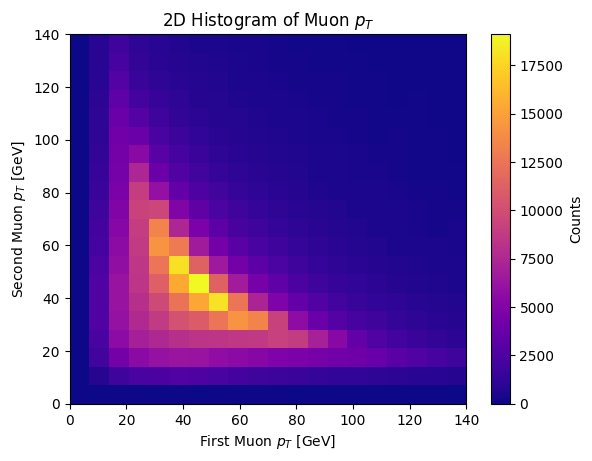

In [63]:
# Create a mask for events that have at least 2 muons
mask = ak.num(truth_muon_pt) >= 2

# Apply the mask to select only the events that have at least 2 muons
valid_pt = truth_muon_pt[mask]

# Slice out first and second muon's values for each event
first_muon_pt = valid_pt[:, 0]
second_muon_pt = valid_pt[:, 1]

# Convert to numpy arrays to make the histogram
x = ak.to_numpy(second_muon_pt)
y = ak.to_numpy(first_muon_pt)

# Define bins
x_bin = np.linspace(0, 140, 21) # 20 bins from 0 to 140 GeV (bin width = 7 GeV)
y_bin = np.linspace(0, 140, 21) 

# Make the 2D histogram
plt.hist2d(x, y, bins=[x_bin, y_bin], cmap='plasma')
plt.xlabel("First Muon $p_T$ [GeV]")
plt.ylabel("Second Muon $p_T$ [GeV]")
plt.colorbar(label="Counts")
plt.title("2D Histogram of Muon $p_T$")
plt.show()

What does this plot mean? What is it showing? Let's talk about it! 

* We see that there aren't much muons with $p_T < 7$ GeV, which indicates why our acceptance is high.

* The upper left corner of the plot is pretty empty. This means that for a given event, we aren't very likely to find two muons that both have high transverse momentum. We see that if one muon has a high transverse momentum, then the other does not. 

* The most counts (the brightest spot) occurs when both muons have a transverse momentum of about 45 GeV. The Z boson has a mass of about 90 GeV. Thus, most muons are produced with the Z boson at rest. 

Let us now make a 2D histrogram of $\eta$ vs. $p_T$ for the second muon in each event. This process is similar to how we got the histrogram above, except now we must `mask` both `truth_muon_pt` *and* `truth_muon_eta` at the same time to make sure we don't mismatch events. 

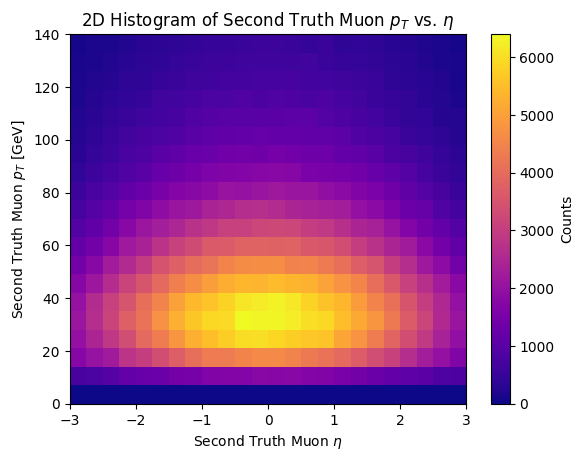

In [64]:
# Create a mask for events that have at least two muons for both arrays
mask = (ak.num(truth_muon_pt) >= 2) & (ak.num(truth_muon_eta) >= 2)

# Apply the mask to select only the events that have at least 2 muons
valid_pt = truth_muon_pt[mask]
valid_eta = truth_muon_eta[mask]

# Slice out second muon's values for each event
second_muon_pt = valid_pt[:, 1]
second_muon_eta = valid_eta[:, 1]

# Convert to numpy arrays to make the histogram
x = ak.to_numpy(second_muon_eta)
y = ak.to_numpy(second_muon_pt)

# Define bins
x_bin = np.linspace(-3, 3, 25)  # 24 bins from -3 to 3 (bin width = 0.25)
y_bin = np.linspace(0, 140, 21) # 20 bins from 0 to 140 GeV (bin width = 7 GeV)

# Make the 2D histogram
plt.hist2d(x, y, bins=[x_bin, y_bin], cmap='plasma')
plt.xlabel("Second Truth Muon $\eta$")
plt.ylabel("Second Truth Muon $p_T$ [GeV]")
plt.colorbar(label="Counts")
plt.title("2D Histogram of Second Truth Muon $p_T$ vs. $\eta$")
plt.show()

What does this plot mean? What is it showing? Let's talk about it! 

* We see that there are practically zero muons with $p_T < 7$ GeV, and a good amount of muons with $|\eta| > 2.5$. This shows that the main contributor of lower acceptance are the $\eta$ values.

* The plot looks symmetrical about the $\eta = 0$ axis. This reflects the fact that the LHC smashes two protons together, both of which are heading each other at the same speed; in other words, the collisions are symmetrical, so we expect the angles of the scattered particle to be symmetrical. 

* Most of the muons have an angle of $\eta = 0$.

### Efficiency of $Z \rightarrow \mu \mu$

Now that we have calculated the acceptance and have made 2D histograms, let us now do the same for the efficinecy. Efficiency is about trying to answer the question: "How likely is that I will reconstruct a particle that looks like this?" So we're going to make four histograms to answer that question.

Our first histogram will be `truth_muon_pt` vs. `truth_muon_eta` for *all* truth muons. We have previously created arrays that have these values: `muon_pt_flat` and `muon_eta_flat`.

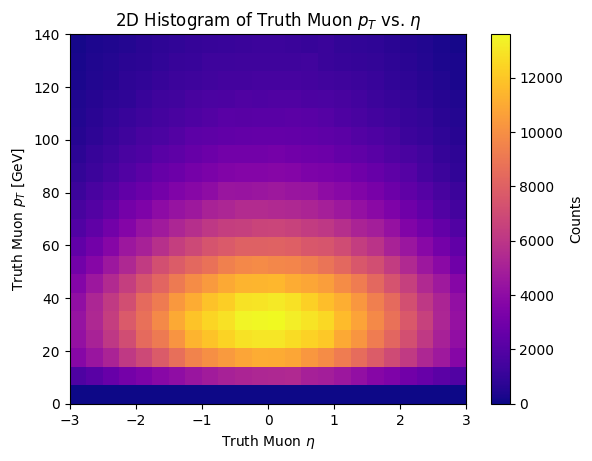

In [67]:
# Convert to numpy arrays to make the histogram
x = ak.to_numpy(muon_eta_flat)
y = ak.to_numpy(muon_pt_flat) 

# Define bins
x_bin = np.linspace(-3, 3, 25)  # 24 bins from -3 to 3 (bin width = 0.25)
y_bin = np.linspace(0, 140, 21) # 20 bins from 0 to 140 GeV (bin width = 7 GeV)

# Make the 2D histogram
plt.hist2d(x, y, bins=[x_bin, y_bin], cmap='plasma')
plt.xlabel("Truth Muon $\eta$")
plt.ylabel("Truth Muon $p_T$ [GeV]")
plt.colorbar(label="Counts")
plt.title("2D Histogram of Truth Muon $p_T$ vs. $\eta$")
plt.show()

Our second histogram will be `truth_muon_eta` vs. `truth_muon_phi` for *all* truth muons. 

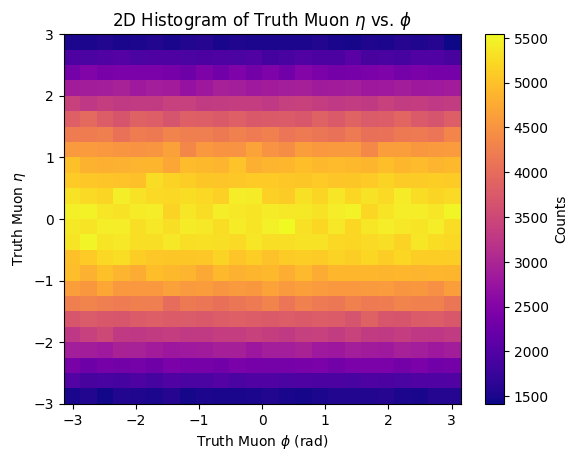

In [68]:
# Convert to numpy arrays to make the histogram
x = ak.to_numpy(muon_phi_flat) 
y = ak.to_numpy(muon_eta_flat)

# Define bins
x_bin = np.linspace(-np.pi, np.pi, 25) # 24 bins from -pi to pi
y_bin = np.linspace(-3, 3, 25)  # 24 bins from -3 to 3 (bin width = 0.25)

# Make the 2D histogram
plt.hist2d(x, y, bins=[x_bin, y_bin], cmap='plasma')
plt.xlabel("Truth Muon $\phi$ (rad)")
plt.ylabel("Truth Muon $\eta$")
plt.colorbar(label="Counts")
plt.title("2D Histogram of Truth Muon $\eta$ vs. $\phi$")
plt.show()

Next we want to do **matching** in which we check if there is a reconstructed muon with $dR < 0.1$ to the truth muon:

$$ dR(a,b)^2 = (\eta_1 - \eta_2)^2 + (\phi_1 - \phi_2)^2. $$

This is basically an opening angle in $\eta\phi$-space. You can treat it just like finding a distance in the $xy$-plane, in which $d^2 = (x_1 - x_2)^2 + (y_1 - y_2)^2$. If there is a reconstructed muon within that distance, we say that the truth muon "matched".

Here $\eta_1$ and $\phi_1$ refer to the angle values for the lepton, and $\eta_2$ and $\phi_2$ refer to the angle values for the truth muon. If we find $dR < 0.1$, then the lepton has been successfully reconstructed.

For this part of the analysis, we will need the following set of variables:

In [70]:
# Define what variables are important to our analysis
variables = ['lep_pt', 'lep_eta', 'lep_phi', 'lep_type']

# To see all the data for our given variables
tree.iterate(variables, library="ak"),

(<generator object HasBranches.iterate at 0x5579d95b42b0>,)

In [85]:
# Creating arrays for truth_muon_pt and truth_muon_eta
for array in tree.iterate(variables, library="ak"):
    lep_pt = array["lep_pt"]
    lep_eta = array["lep_eta"]
    lep_phi = array["lep_phi"]

    # Flatten to treat all muons across all events as one big list
    lep_pt_flat = ak.flatten(lep_pt)
    lep_eta_flat = ak.flatten(lep_eta)
    lep_phi_flat = ak.flatten(lep_phi)

In [86]:
def matching(muon_eta_list, muon_phi_list, lep_eta_list, lep_phi_list):
    number_reconstructed = 0
    number_total = 0
    
    for muon_eta, muon_phi, lep_eta, lep_phi in zip(muon_eta_list, muon_phi_list, lep_eta_list, lep_phi_list):
        dR = np.sqrt( (muon_eta - lep_eta)**2 + (muon_phi - lep_phi)**2 )
        if dR < 0.1:
            number_reconstructed += 1
            number_total += 1
        else:
            number_total += 1
        
    print(f"Number of leptons reconstructed: {number_reconstructed}")
    print(f"Total number of events: {number_total}")
    print(f"Efficiency: {number_reconstructed/number_total:.4f}")

In [87]:
# Calling our matching function
matching(muon_eta_flat, muon_phi_flat, lep_eta_flat, lep_phi_flat)

Number of leptons reconstructed: 1417
Total number of events: 1597580
Efficiency: 0.0009


In [88]:
print(muon_eta_flat)
print(lep_eta_flat)
print(muon_phi_flat)
print(lep_phi_flat)

[0.647, 0.606, -1.42, -2.12, -0.895, ..., 3.67, -3.82, -1.61, -0.632, -0.398]
[-0.317, 0.421, 0.854, 0.24, 2.2, ..., -0.522, 0.233, -1.61, -0.398, -0.632]
[-2.83, -2.01, -1.56, 1.52, 2.45, -1.13, ..., -2.85, 1.02, 2.52, -3.14, -0.795]
[1.73, -1.37, 0.528, 2.81, -3.13, -2.08, ..., -1.33, -2.7, 2.52, -0.795, -3.14]


We will now make a histogram of `truth_muon_pt` vs. `truth_muon_eta` for the matched truth muons.

In [103]:
def matching(muon_eta_list, muon_phi_list, lep_eta_list, lep_phi_list):
    matched_muon_eta = []
    matched_muon_phi = []
    
    for muon_eta, muon_phi, lep_eta, lep_phi in zip(muon_eta_list, muon_phi_list, lep_eta_list, lep_phi_list):
        dR = np.sqrt( (muon_eta - lep_eta)**2 + (muon_phi - lep_phi)**2 )
        if dR < 0.1:
            matched_muon_eta.append(muon_eta)
            matched_muon_phi.append(muon_phi)

In [104]:
# Calling our matching function
matching(muon_eta_flat, muon_phi_flat, lep_eta_flat, lep_phi_flat)

In [102]:
# Convert to numpy arrays to make the histogram
x = matched_muon_phi
y = matched_muon_eta

# Define bins
x_bin = np.linspace(-np.pi, np.pi, 25) # 24 bins from -pi to pi
y_bin = np.linspace(-3, 3, 25)  # 24 bins from -3 to 3 (bin width = 0.25)

# Make the 2D histogram
plt.hist2d(x, y, bins=[x_bin, y_bin], cmap='plasma')
plt.xlabel("Truth Muon $\phi$ (rad)")
plt.ylabel("Truth Muon $\eta$")
plt.colorbar(label="Counts")
plt.title("2D Histogram of Truth Muon $\eta$ vs. $\phi$")
plt.show()

NameError: name 'matched_muon_phi' is not defined

We will now make a histogram of `truth_muon_eta` vs. `truth_muon_phi` for the matched truth muons.

## Case Study 2: New Physics Searches

"This is where we talk folks through a nice example of a physics analysis, something really "easy" and point out that the concepts of acceptance and efficiency really are used and are really important."